# Visualizaciones en Python - Primer Entrega
Autor: Tomás Goncalves  
Curso: Data Science I  
Comisión: 84655  
Fecha: 19-01-2026

## Abstract

Este proyecto tiene como objetivo realizar un análisis exploratorio sobre el consumo global de alcohol utilizando el dataset “Global Alcohol Consumption (WHO, 2000–2022)”.  
El conjunto de datos contiene información anual del consumo per cápita de alcohol, medido en litros de alcohol puro por persona mayor de 15 años, para 188 países durante el período 2000–2022.

A partir de este dataset se busca identificar patrones temporales y geográficos en el consumo, comparar países y analizar tendencias a lo largo del tiempo.  
Se exploran preguntas relacionadas con qué países presentan mayores niveles de consumo, si existen diferencias regionales significativas y cómo ha evolucionado el consumo promedio mundial.

El análisis se realiza mediante técnicas de estadística descriptiva y visualización de datos, incluyendo gráficos univariados, bivariados y multivariados.  
Además, se verifica la calidad del dataset, comprobando la ausencia de valores faltantes y la consistencia de las variables.

Los resultados permiten obtener conclusiones preliminares sobre la distribución del consumo de alcohol en el mundo, destacando diferencias entre países y regiones, y observando que el consumo global se ha mantenido relativamente estable en las últimas décadas.

Este trabajo constituye un primer acercamiento al dataset y sienta las bases para futuros análisis más avanzados, como segmentaciones regionales, clustering o modelos predictivos.

## Descripción del Dataset

El dataset utilizado corresponde al consumo global de alcohol reportado por la Organización Mundial de la Salud (WHO) para el período 2000–2022.


Contiene información anual sobre el consumo per cápita de alcohol (litros de alcohol puro por persona mayor de 15 años) para 188 países.

Cada fila representa:

- Un país  
- Un año específico  
- Una estimación del consumo promedio de alcohol  

El dataset incluye además intervalos de confianza para cada medición, lo cual permite analizar la incertidumbre de los valores reportados.

### Estructura del dataset

- Total de registros: 4324  
- Total de columnas: 9  
- Rango temporal: 2000–2022  
- No presenta valores faltantes  

Principales variables:

- `country`: nombre del país  
- `year`: año de medición  
- `alcohol_liters_per_capita`: consumo anual per cápita  
- `lower_ci` y `upper_ci`: intervalos de confianza  
- `ci_width`: amplitud del intervalo  

## Preguntas de investigación

A partir del dataset seleccionado se plantean las siguientes preguntas:

1. ¿Qué países presentan los niveles más altos y más bajos de consumo de alcohol per cápita?
2. ¿Ha aumentado o disminuido el consumo global de alcohol entre 2000 y 2022?
3. ¿Existen diferencias significativas entre países y regiones del mundo?
4. ¿Argentina se encuentra por encima o por debajo del promedio mundial?
5. ¿El nivel de incertidumbre en las mediciones varía entre países?

## Hipótesis

H1: Los países europeos presentan los mayores niveles de consumo de alcohol per cápita.

H2: A nivel global, el consumo de alcohol ha mostrado una leve tendencia a la baja en los últimos años.

H3: Los países con mayor consumo tienden a tener valores relativamente estables a lo largo del tiempo.

H4: América Latina presenta niveles intermedios de consumo en comparación con Europa y Asia.

H5: Los países con menor consumo reportan intervalos de confianza más amplios.


In [13]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/tagoncalves/data_science_global_alcohol_consumption_project/main/resources/dataset_global_alcohol_consumption.csv"

df = pd.read_csv(url)

df.head()


,country,iso3,year,sex,alcohol_liters_per_capita,lower_ci,upper_ci,ci_width,IndicatorCode
0,Italy,ITA,2003,Both sexes,9.622988,7.965011,11.388622,3.423611,SA_0000001688
1,"Tanzania, United Republic of",TZA,2006,Both sexes,6.337646,4.767623,8.109324,3.341701,SA_0000001688
2,Cyprus,CYP,2017,Both sexes,6.117152,4.627244,7.798063,3.170819,SA_0000001688
3,Sierra Leone,SLE,2019,Both sexes,0.253228,0.100851,0.567434,0.466583,SA_0000001688
4,Philippines,PHL,2017,Both sexes,6.023875,4.681733,7.536645,2.854912,SA_0000001688


## Identificación de valores perdidos

Se verificó la presencia de valores faltantes en el dataset mediante el método `isnull().sum()`.

El resultado indica que ninguna columna presenta valores nulos. Por lo tanto, el dataset es completo y no requiere procesos de imputación o limpieza relacionados con datos faltantes.


In [ ]:
df.isnull().sum()

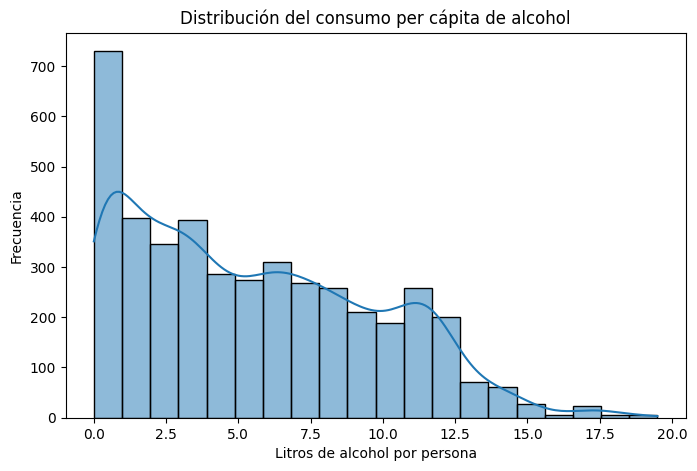

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df["alcohol_liters_per_capita"], bins=20, kde=True)
plt.title("Distribución del consumo per cápita de alcohol")
plt.xlabel("Litros de alcohol por persona")
plt.ylabel("Frecuencia")
plt.show()

### Interpretación

La distribución del consumo de alcohol presenta una asimetría positiva.  
La mayoría de los países se concentran en valores bajos o moderados, mientras que un grupo reducido muestra consumos muy elevados.


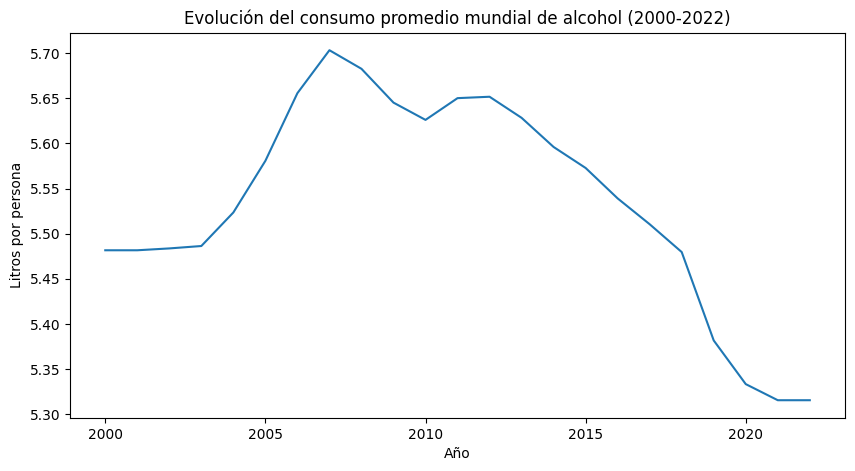

In [16]:
promedio_anual = df.groupby("year")["alcohol_liters_per_capita"].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=promedio_anual, x="year", y="alcohol_liters_per_capita")
plt.title("Evolución del consumo promedio mundial de alcohol (2000-2022)")
plt.ylabel("Litros por persona")
plt.xlabel("Año")
plt.show()

### Interpretación

El gráfico muestra que el consumo promedio mundial se ha mantenido relativamente estable durante el período analizado, con ligeras variaciones.  
No se observa un crecimiento sostenido, lo cual respalda parcialmente la hipótesis H2.


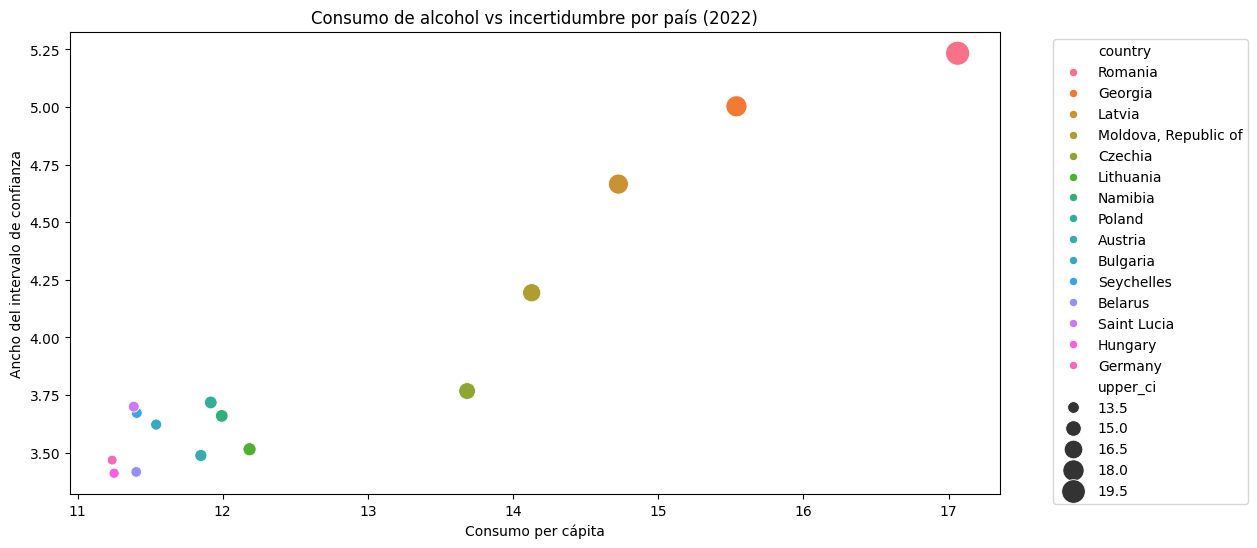

In [17]:
data_2022 = df[df["year"] == 2022].sort_values("alcohol_liters_per_capita", ascending=False).head(15)

plt.figure(figsize=(12,6))

sns.scatterplot(
    data=data_2022,
    x="alcohol_liters_per_capita",
    y="ci_width",
    hue="country",
    size="upper_ci",
    sizes=(50, 300)
)

plt.title("Consumo de alcohol vs incertidumbre por país (2022)")
plt.xlabel("Consumo per cápita")
plt.ylabel("Ancho del intervalo de confianza")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Interpretación

Este gráfico multivariado permite observar la relación entre el nivel de consumo y la incertidumbre asociada a cada país.

Se observa que los países con mayor consumo no necesariamente presentan mayor incertidumbre, lo cual sugiere que la calidad de las estimaciones es relativamente consistente.

Además, permite identificar visualmente qué países se destacan tanto en consumo como en amplitud del intervalo de confianza.


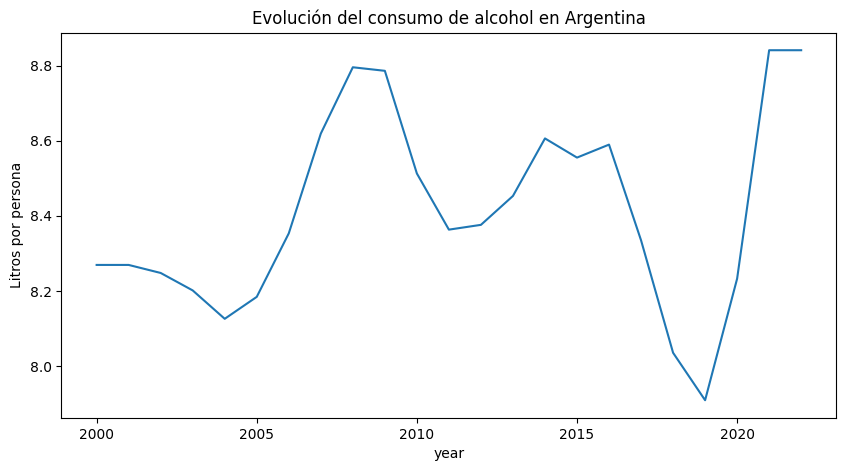

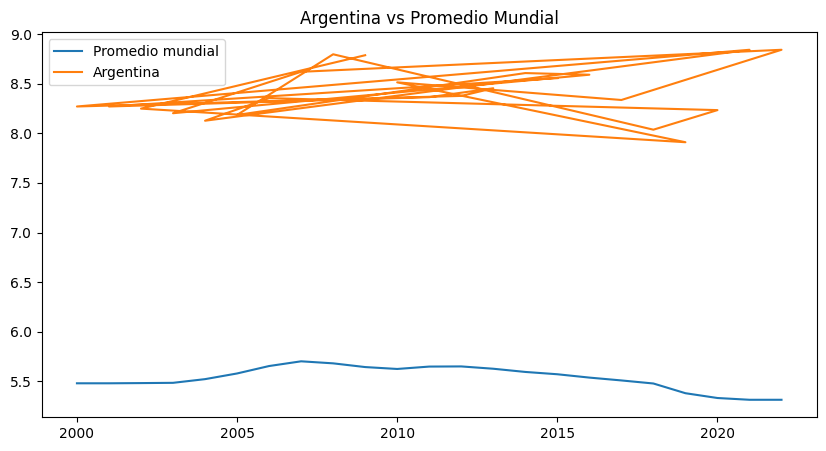

In [18]:
arg = df[df["country"] == "Argentina"]

plt.figure(figsize=(10,5))
sns.lineplot(data=arg, x="year", y="alcohol_liters_per_capita")
plt.title("Evolución del consumo de alcohol en Argentina")
plt.ylabel("Litros por persona")
plt.show()

plt.figure(figsize=(10,5))
plt.plot(promedio_anual["year"], promedio_anual["alcohol_liters_per_capita"], label="Promedio mundial")
plt.plot(arg["year"], arg["alcohol_liters_per_capita"], label="Argentina")
plt.legend()
plt.title("Argentina vs Promedio Mundial")
plt.show()

### Interpretación

Argentina presenta niveles de consumo superiores al promedio mundial durante gran parte del período analizado, lo cual confirma que se ubica dentro de los países de consumo medio-alto.


## Conclusiones

A partir del análisis exploratorio realizado se concluye que:

- El dataset es completo y no contiene valores faltantes.
- Existen diferencias significativas entre países en términos de consumo de alcohol.
- Europa concentra muchos de los países con mayor consumo, lo que respalda la hipótesis H1.
- A nivel global no se observa un aumento marcado del consumo, lo que respalda parcialmente H2.
- Argentina se encuentra por encima del promedio mundial.
- La incertidumbre de las mediciones varía entre países pero no está directamente asociada al nivel de consumo.

Este análisis constituye una base sólida para estudios futuros más avanzados, como segmentaciones regionales o modelos predictivos.
